# EN3160 Assignment 1 on Intensity Transformations and Neighborhood Filtering

## 1.  Implement the intensity transformation 

In [2]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt

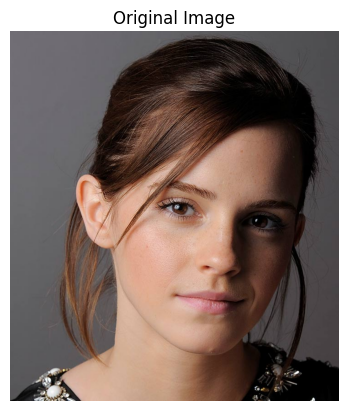

In [3]:
# Read the image using OpenCV
img = cv2.imread('a1images/emma.jpg')

# Convert BGR image to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image using Matplotlib
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')  # Hide the axis
plt.show()

In [ ]:
def intensity_transform(pix):
    if (0<= pix and pix <= 50):
        return (1)*pix
    elif (50< pix and pix <= 150):
        return ((255-100)/(150-50))*pix
    elif (150< pix and pix <= 255):
        return ((255-100)/(255-150))*pix